# Import data

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import copy, torch, os
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# Data analysis
Sex

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

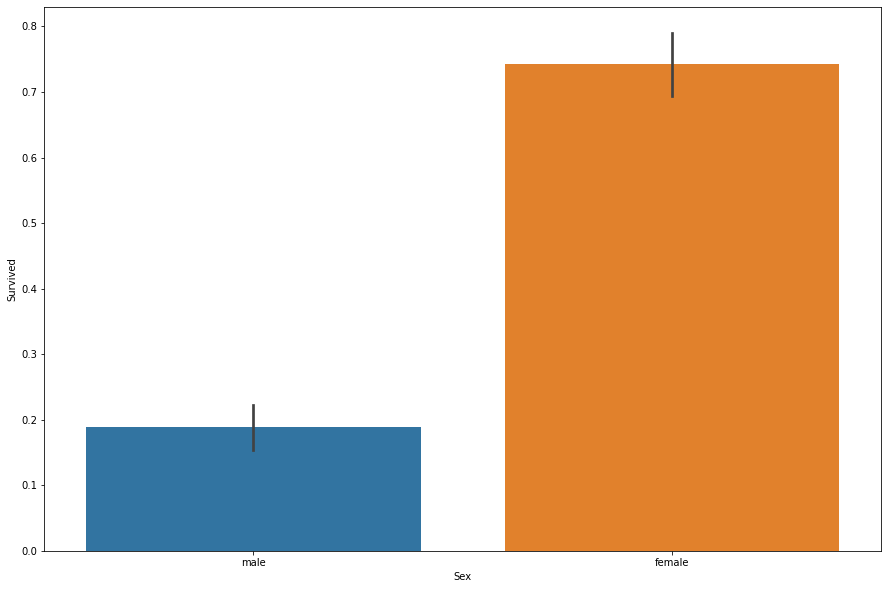

In [86]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(15,10)) 
sns.barplot(data=train_df,x='Sex',y='Survived')

Female is likely to surived than male
## Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

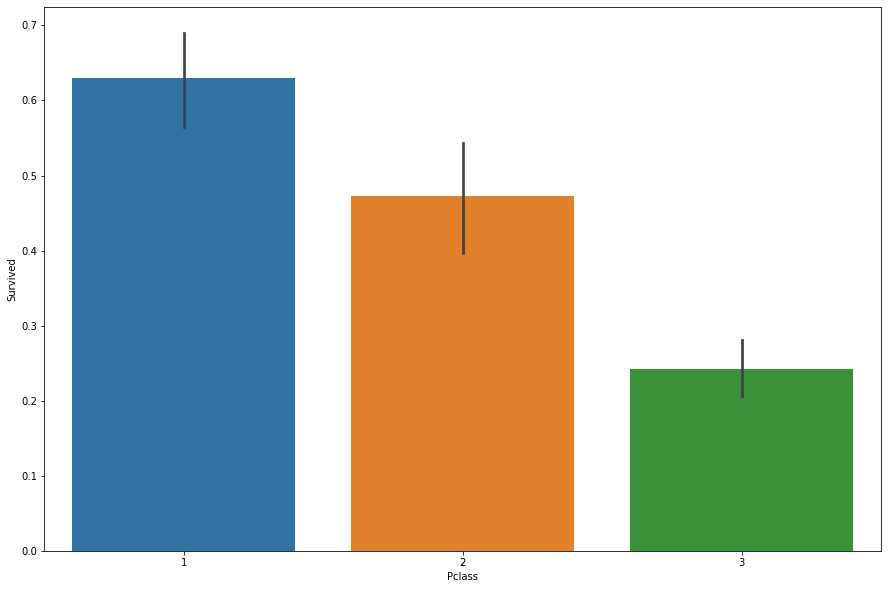

In [87]:
fig, axs = plt.subplots(figsize=(15,10)) 
sns.barplot(data=train_df,x='Pclass',y='Survived')

Passenger in higher tier (class 1) is more likely to survived
# Age


177

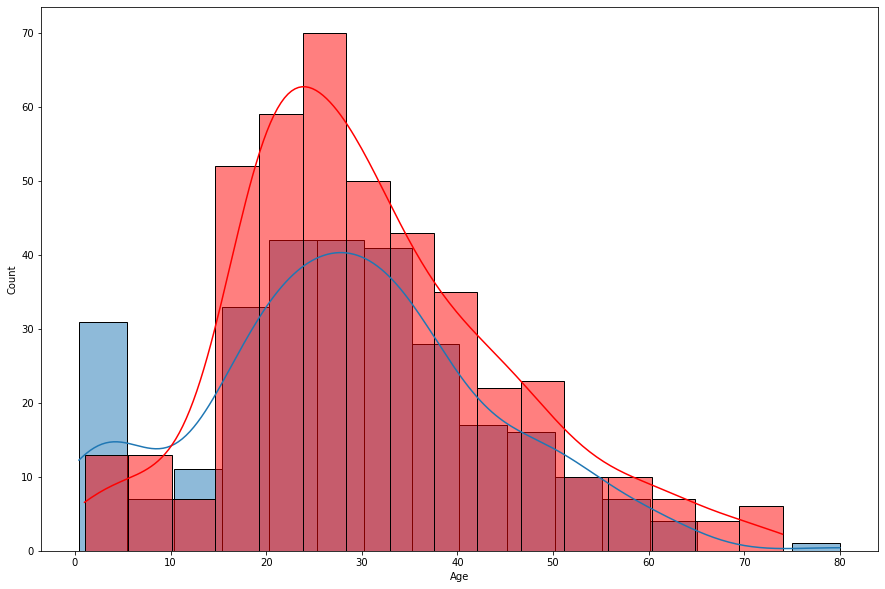

In [88]:
fig, axs = plt.subplots(figsize=(15,10)) 
sns.histplot(data=train_df[train_df['Survived']==1],x='Age',kde=True)
sns.histplot(data=train_df[train_df['Survived']==0],x='Age',kde=True,color='red')
train_df['Age'].isnull().sum()

There are 177 age with null element, thus the data is added by random number based on known mean and standard deviation

In [129]:
for i in range(1000):
    null_fill_list = np.random.standard_normal(size=null_size)*age_std+age_mean
    if (null_fill_list<0).sum() == 0:
        break

0

In [132]:
null_size = data_df['Age'].isnull().sum()
age_mean = data_df['Age'].mean()
age_std = data_df['Age'].std()
print(f'Age mean = {age_mean}, Age std = {age_std}')
for i in range(1000):
    null_fill_list = np.random.standard_normal(size=null_size)*age_std+age_mean
    if (null_fill_list<0).sum() == 0:
        break

cnt = 0
for i in range(data_df.shape[0]):
    if not(data_df['Age'][i] > -1):
        data_df['Age'][i] = null_fill_list[cnt]
        cnt+=1


Age mean = 29.881137667304014, Age std = 14.413493211271334


C:\Users\chand\AppData\Local\Temp\ipykernel_7128\1460948571.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Age'][i] = null_fill_list[cnt]


<AxesSubplot:xlabel='Age', ylabel='Count'>

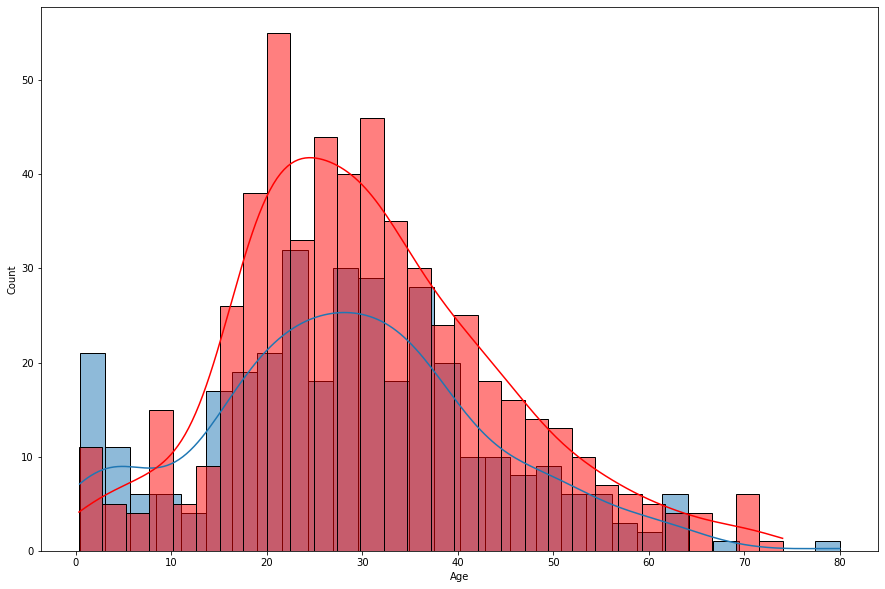

In [134]:
fig, axs = plt.subplots(figsize=(15,10)) 
sns.histplot(data=data_df[data_df['Survived']==1],x='Age',kde=True,bins=30)
sns.histplot(data=data_df[data_df['Survived']==0],x='Age',kde=True,color='red',bins=30)

In [136]:
data_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.023645,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.073295,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.324231,0.060832,0.018322,-0.558629
Age,0.023645,-0.073295,-0.324231,1.000000,-0.183987,-0.109920,0.154087
SibSp,-0.055224,-0.035322,0.060832,-0.183987,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.109920,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.154087,0.160238,0.221539,1.000000
